In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt
from sklearn. model_selection import train_test_split
import re

In [2]:
df = pd. read_csv("E:\LiveProject\Airbnb Reviews\AirBNBReviews.csv")

In [3]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Genre   341 non-null    object 
 1   Review  341 non-null    object 
 2   label   341 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.4+ KB


In [4]:
df. shape

(354, 3)

In [5]:
df. head()

,Genre,Review,label
0,Location,"The location of this Airbnb was perfect, close...",1.0
1,Cleanliness,"The cleanliness of the Airbnb was outstanding,...",1.0
2,Neighborhood,The neighborhood where this Airbnb is situated...,1.0
3,Security,I felt completely safe and secure during my st...,1.0
4,Pet Friendliness,"They were so welcoming to my pet, it felt like...",1.0


In [6]:
df. isna(). sum()

Genre     13
Review    13
label     13
dtype: int64

In [7]:
df = df. dropna()

In [8]:
df. isna(). sum()

Genre     0
Review    0
label     0
dtype: int64

In [9]:
df. duplicated(). sum()

37

In [10]:
df = df. drop_duplicates()

In [11]:
df. label. value_counts()

0.0    197
1.0    107
Name: label, dtype: int64

In [12]:
df. label = df. label. astype('int64')

In [13]:
df. Genre. value_counts()

 Location            56
 Cleanliness         54
 Host                54
 Neighborhood        47
 Security            47
 Pet Friendliness    46
Name: Genre, dtype: int64

In [14]:
df. label. value_counts(normalize = True)

0    0.648026
1    0.351974
Name: label, dtype: float64

In [18]:
df = df. drop(["Genre"], axis = 1)

In [19]:
df. head()

,Review,label
0,"The location of this Airbnb was perfect, close...",1
1,"The cleanliness of the Airbnb was outstanding,...",1
2,The neighborhood where this Airbnb is situated...,1
3,I felt completely safe and secure during my st...,1
4,"They were so welcoming to my pet, it felt like...",1


In [26]:
from nltk. corpus import stopwords
from nltk. tokenize import word_tokenize

In [30]:
# Clean text data
stop_words = set(stopwords.words('english'))

In [31]:
# Clean text data
def clean_text(text):
    # Remove special characters and symbols
    text = re.sub(r'[^a-zA-Z0-9\s<>]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text
    return text

In [32]:
df["Review"] = df["Review"]. apply(clean_text)

In [33]:
df. head()

,Review,label
0,location airbnb perfect close popular attractions,1
1,cleanliness airbnb outstanding everything spot...,1
2,neighborhood airbnb situated vibrant full life,1
3,felt completely safe secure stay airbnb,1
4,welcoming pet felt like home away home,1


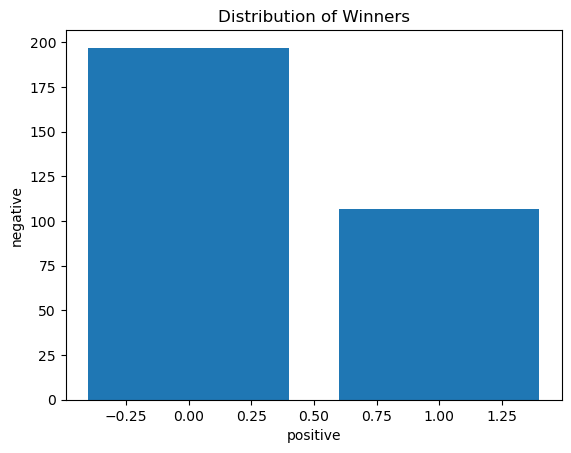

In [34]:
# Class distribution
class_counts = df['label'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('positive')
plt.ylabel('negative')
plt.title('Distribution of Winners')
plt.show()

In [35]:
# Select relevant features for the prediction task
X = df['Review']  # Useinput features
y = df['label']  # Use column as the target variable

In [36]:
X.shape

(304,)

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(243,)

In [42]:
# Apply text feature extraction techniques (e.g., TF-IDF) on the text data
from sklearn. feature_extraction. text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [43]:
from sklearn. ensemble import RandomForestClassifier

In [44]:
# Train a machine learning model on the training data
model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [45]:
from sklearn. metrics import accuracy_score

In [47]:
# Evaluate the model on the testing data
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9344262295081968


In [48]:
x_pred = model_rf.predict(X_train)
accuracy = accuracy_score(y_train, x_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [49]:
# Model Training
# Train a machine learning model on the training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9180327868852459


In [51]:
x_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, x_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9876543209876543


In [52]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.76      0.86        21

    accuracy                           0.92        61
   macro avg       0.94      0.88      0.90        61
weighted avg       0.93      0.92      0.91        61



In [53]:
import pickle
pickle. dump(model, open("AirBNBreview.pickle", "wb"))

In [54]:
new_review = ["BRUSSELS (Reuters) - British Prime Minister Theresa May s offer of  settled status  for EU residents is flawed and will leave them with fewer rights after Brexit, the European Parliament s Brexit coordinator said on Tuesday. A family of five could face a bill of 360 pounds to acquire the new status, Guy Verhofstadt told May s Brexit Secretary David Davis in a letter seen by Reuters    a very significant amount for a family on low income . Listing three other concerns for the EU legislature, which must approve any treaty on the March 2019 exit, Verhofstadt told Davis:  Under your proposals, EU citizens will definitely notice a deterioration of their status as a result of Brexit. And the Parliament s aim all along has been that EU citizens, and UK citizens in the EU-27, should notice no difference.  Verhofstadt, a former Belgian prime minister, wrote in response to Davis, who had written to him after Parliament complained last week that there remained  major issues  to be settled on the rights of the 3 million EU citizens in Britain. On Tuesday, he told reporters that Parliament was determined that expatriates should not become  victims of Brexit . May had unveiled more details last week of a system aimed at giving people already in Britain a quick and cheap way of asserting their rights to stay there indefinitely. The issue, along with how much Britain owes and the new EU-UK border across Ireland, is one on which the EU wants an outline agreement before opening talks on the future of trade. Verhofstadt said lawmakers were not dismissing British efforts to streamline applications but saw flaws in the nature of  settled status  itself. As well as the cost, which is similar to that of acquiring a British passport, he cited three others: - Europeans should simply  declare  a whole household resident, without needing an  application  process; the burden of proof should be on the British authorities to deny them rights. - more stringent conditions on criminal records could mean some EU residents, including some now with permanent resident status, being deported for failing to gain  settled status . - EU residents would lose some rights to bring relatives to Britain as the new status would give them the same rights as British people, who now have fewer rights than EU citizens."]
new_review_transformed = vectorizer.transform(new_review)
predictions = model.predict(new_review_transformed)
for prediction in predictions:
    if prediction == 1:
        print("Positive")
    else:
        print("Negative")

Negative


In [57]:
import sklearn
print(sklearn.__version__)

1.2.2


In [59]:
import nltk
print(nltk.__version__)

3.7
